<a href="https://colab.research.google.com/github/asyep/Klasifikasi_Gambar-Suit_Jari/blob/main/Klasifikasi_Gambar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **DATA DIRI**

*   Nama: Asep Nadhirin
*   Asal: Kabupaten Bandung



## **Download dan Ekstrak Dataset**

In [ ]:
!wget --no-check-certificate \
  https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip

--2025-07-18 13:33:05--  https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/391417272/7eb836f2-695b-4a46-9c78-b65867166957?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-07-18T14%3A26%3A13Z&rscd=attachment%3B+filename%3Drockpaperscissors.zip&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-07-18T13%3A26%3A05Z&ske=2025-07-18T14%3A26%3A13Z&sks=b&skv=2018-11-09&sig=MNFjohKPlm6WFs35GvtGV0qWF%2FQfycXnndY518k8Kpk%3D&jwt=eyJhbGciOiJIUzI1NiIsInR5cCI6IkpXVCJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc1Mjg0NTg4NSwibmJmIjoxNzUyODQ1NTg1LCJwYXRoIjoicmVsZWFzZWFzc2V0

In [ ]:
import zipfile, os
local_zip = './rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

### Membuat Direktori Train dan Test

In [ ]:
base_dir = '/tmp/rockpaperscissors/rps-cv-images'

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

In [ ]:
paper_dir = os.path.join(base_dir,'paper')
rock_dir = os.path.join(base_dir,'rock')
scissors_dir = os.path.join(base_dir,'scissors')

In [ ]:
print("Rock : ",len(os.listdir(rock_dir)))
print("Paper : ",len(os.listdir(paper_dir)))
print("Scissors : ",len(os.listdir(scissors_dir)))

Rock :  726
Paper :  712
Scissors :  750


In [ ]:
train_rock_dir = os.path.join(train_dir, 'rock')
train_paper_dir = os.path.join(train_dir, 'paper')
train_scissors_dir = os.path.join(train_dir, 'scissors')

val_rock_dir = os.path.join(val_dir, 'rock')
val_paper_dir = os.path.join(val_dir, 'paper')
val_scissors_dir = os.path.join(val_dir, 'scissors')

os.makedirs(train_rock_dir, exist_ok=True)
os.makedirs(train_paper_dir, exist_ok=True)
os.makedirs(train_scissors_dir, exist_ok=True)
os.makedirs(val_rock_dir, exist_ok=True)
os.makedirs(val_paper_dir, exist_ok=True)
os.makedirs(val_scissors_dir, exist_ok=True)

## **Split Dataset 40% untuk Validasi**

In [ ]:
from sklearn.model_selection import train_test_split

train_rock, val_rock = train_test_split(os.listdir(rock_dir), test_size=0.4)
train_paper, val_paper = train_test_split(os.listdir(paper_dir), test_size=0.4)
train_scissors, val_scissors = train_test_split(os.listdir(scissors_dir), test_size=0.4)

In [ ]:
import shutil

# Loop train set for copy data to separate folder (train) using [shutil]
for img in train_rock:
  shutil.copy(os.path.join(rock_dir, img), os.path.join(train_rock_dir, img))

for img in train_paper:
  shutil.copy(os.path.join(paper_dir, img), os.path.join(train_paper_dir, img))

for img in train_scissors:
  shutil.copy(os.path.join(scissors_dir, img), os.path.join(train_scissors_dir, img))

# Loop validation set for copy data to separate folder (validation) using [shutil]
for img in val_rock:
  shutil.copy(os.path.join(rock_dir, img), os.path.join(val_rock_dir, img))

for img in val_paper:
  shutil.copy(os.path.join(paper_dir, img), os.path.join(val_paper_dir, img))

for img in val_scissors:
  shutil.copy(os.path.join(scissors_dir, img), os.path.join(val_scissors_dir, img))

## **Augmentasi Data menggunakan ImageDataGenerator**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(180,180),
        batch_size=32,
        seed=42,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        val_dir,  # direktori data latih
        target_size=(180,180),
        batch_size=32,
        seed=42,
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


## **Membuat Model CNN**

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(180, 180, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    21,234,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,919,299 (83.62 MB)

 Trainable params: 21,919,299 (83.62 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(
      train_generator,
      # steps_per_epoch=25, # Hapus atau komentari baris ini
      epochs=15,
      validation_data=validation_generator,
      # validation_steps=5, # Hapus atau komentari baris ini
      verbose=2)

Epoch 1/15
41/41 - 215s - 5s/step - accuracy: 0.9688 - loss: 0.0976 - val_accuracy: 0.9795 - val_loss: 0.0703
Epoch 2/15
41/41 - 259s - 6s/step - accuracy: 0.9809 - loss: 0.0620 - val_accuracy: 0.9795 - val_loss: 0.0526
Epoch 3/15
41/41 - 219s - 5s/step - accuracy: 0.9870 - loss: 0.0586 - val_accuracy: 0.9817 - val_loss: 0.0484
Epoch 4/15
41/41 - 212s - 5s/step - accuracy: 0.9886 - loss: 0.0471 - val_accuracy: 0.9772 - val_loss: 0.0648
Epoch 5/15
41/41 - 262s - 6s/step - accuracy: 0.9878 - loss: 0.0506 - val_accuracy: 0.9852 - val_loss: 0.0576
Epoch 6/15
41/41 - 212s - 5s/step - accuracy: 0.9771 - loss: 0.0621 - val_accuracy: 0.9920 - val_loss: 0.0284
Epoch 7/15
41/41 - 221s - 5s/step - accuracy: 0.9886 - loss: 0.0407 - val_accuracy: 0.9760 - val_loss: 0.0615
Epoch 8/15
41/41 - 223s - 5s/step - accuracy: 0.9939 - loss: 0.0250 - val_accuracy: 0.9874 - val_loss: 0.0360
Epoch 9/15
41/41 - 221s - 5s/step - accuracy: 0.9901 - loss: 0.0200 - val_accuracy: 0.9874 - val_loss: 0.0394
Epoch 10/1

## **Visualisasi Hasil Training**

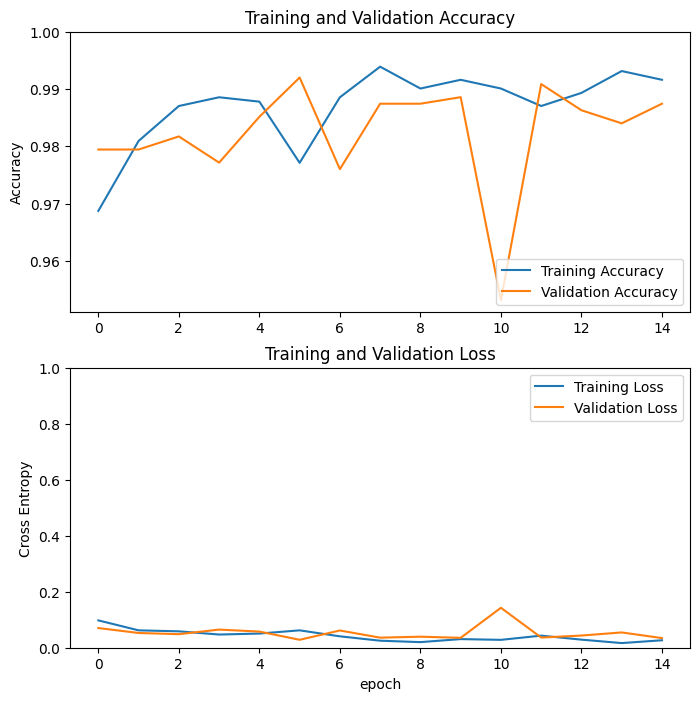

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## **Tes Prediksi Model**

Saving download (3).jpg to download (3).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
download (3).jpg
Hasil Prediksi: scissors


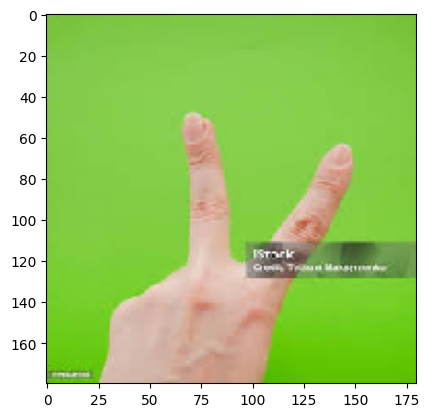

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for test_file in uploaded.keys():
  # predicting images
  path = test_file
  img = image.load_img(path, target_size=(180,180))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  # Lakukan prediksi
  classes = model.predict(images, batch_size=10)

  print(test_file)

  # Cari indeks dengan nilai probabilitas tertinggi
  predicted_index = np.argmax(classes[0])

  # Dapatkan daftar nama kelas dari generator
  # Urutannya akan sesuai: {'paper': 0, 'rock': 1, 'scissors': 2}
  class_labels = list(train_generator.class_indices.keys())

  # Cetak hasil prediksi berdasarkan indeks yang ditemukan
  print(f"Hasil Prediksi: {class_labels[predicted_index]}")